In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math
from sklearn.model_selection import train_test_split

In [4]:
anime = pd.read_csv('data/anime.csv')
rating = pd.read_csv('data/rating.csv')

In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


(array([   6.,   49.,  275.,  733., 1824., 3654., 3822., 1467.,  225.,
           9.]),
 array([ 1.67 ,  2.503,  3.336,  4.169,  5.002,  5.835,  6.668,  7.501,
         8.334,  9.167, 10.   ]),
 <BarContainer object of 10 artists>)

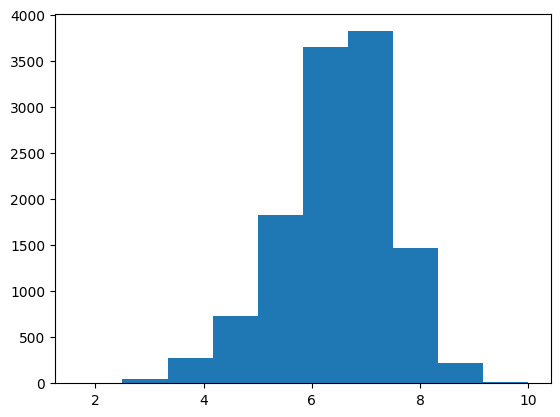

In [10]:
plt.hist(anime.rating)

In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [51]:
rating.sample(5)

,user_id,anime_id,rating
6542456,60411,2520,7
1258650,11897,16009,6
548559,5466,270,-1
454726,4680,23385,10
3358177,30923,31704,10


In [62]:
# remove -1 entries
rating = rating[rating.rating != -1]

(array([  16649.,   23150.,   41453.,  104291.,  282806.,  637775.,
        1375287., 1646019., 1254096.,  955715.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

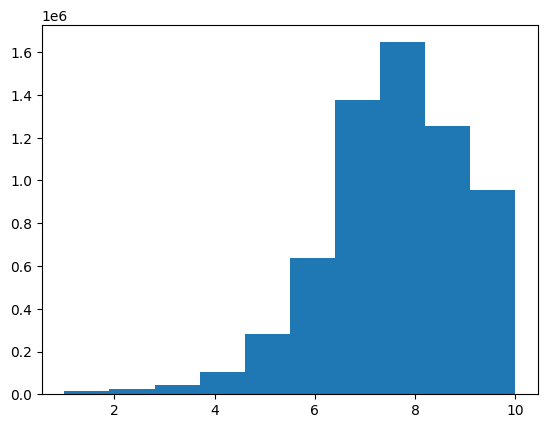

In [63]:
plt.hist(rating.rating)

In [13]:
# We want to do user-user association
# How to do that? Users who have rated same shows similarly are similar
# Some kind of a weighted index

In [16]:
anime.genre.value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [64]:
rating.user_id.count()

6337241

In [89]:
similar_user_ids = None
cur_user_id = None
for user_id in rating.user_id:
    cur_user_id = user_id
    # Find other users who have rated the same anime
    watched_ids = rating[rating.user_id == user_id].anime_id
    sim = rating.groupby(['user_id']).agg({'anime_id': set})
    sim = sim[len(sim.anime_id & watched_ids) != 0]
    sim.reset_index(inplace=True)
    sim = sim[sim.user_id != user_id]
    similar_user_ids = sim
    break

/var/folders/b5/5wttk6911k93lfzfq6j1p1840000gn/T/ipykernel_33698/3980677035.py:8: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  sim = sim[len(sim.anime_id & watched_ids) != 0]


TypeError: unsupported operand type(s) for &: 'set' and 'bool'

In [ ]:
test_user = similar_user_ids.sample()
test_user

In [86]:
test_user.

KeyError: 1

In [78]:
ratings = rating[rating.user_id == test_user.user_id]
ratings

ValueError: Can only compare identically-labeled Series objects

In [87]:
all_ratings = rating[rating.user_id == cur_user_id]

In [88]:
all_ratings

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10


In [69]:
pd.concat([all_ratings, ],

,user_id,anime_id,rating
count,4.0,4.000000,4.0
mean,1.0,11724.750000,10.0
std,0.0,3012.505311,0.0
min,1.0,8074.000000,10.0
25%,1.0,10731.250000,10.0
50%,1.0,11687.000000,10.0
75%,1.0,12680.500000,10.0
max,1.0,15451.000000,10.0
